In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_excel("titanic3.xls")

Text(0, 0.5, 'Porcentaje de supervivencia')

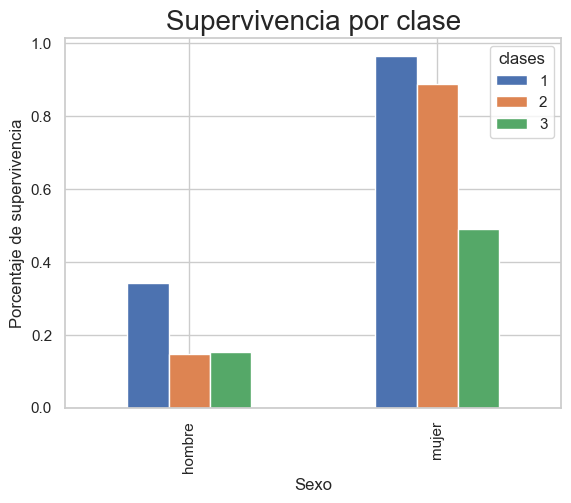

In [103]:

tablaDF= df.pivot_table(values = 'sobrevivio', index = ['sexo'],columns='clases')

#tablaDF= df.pivot_table(values = 'sobrevivio', index = ['clases'],columns='sexo')
#Grafico de barras 

tablaDF.plot(kind="bar")
plt.title("Supervivencia por clase", fontsize=20)
plt.xlabel("Sexo")
plt.ylabel("Porcentaje de supervivencia")

In [104]:
tablaDF

clases,1,2,3
sexo,,,
hombre,0.340782,0.146199,0.152130
mujer,0.965278,0.886792,0.490741


([<matplotlib.axis.XTick at 0x19197de6d10>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80')])

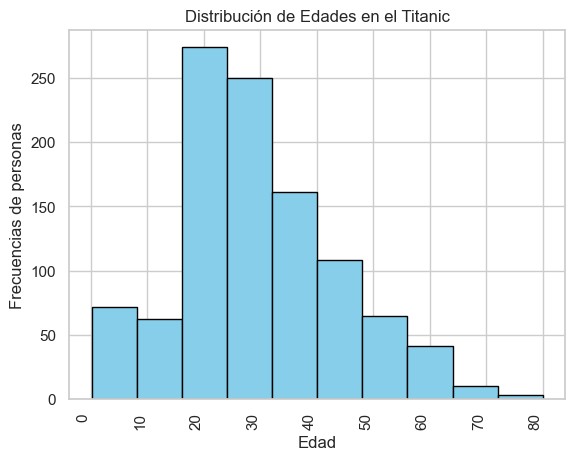

In [147]:
#Histograma
age_data = df['edad'].dropna()
plt.hist(age_data, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencias de personas')
plt.title('Distribución de Edades en el Titanic')
plt.xticks(range(0, 90, 10), rotation=30, ha='right')

Text(0.5, 1.0, 'Distribución de Tarifas en el Titanic')

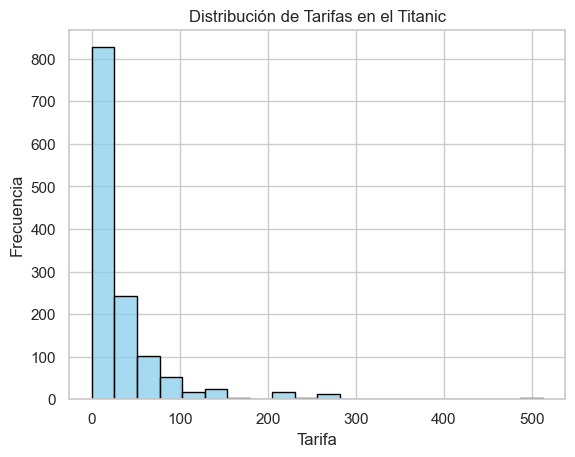

In [106]:
#Histograma
fare_data = df['tarifa'].dropna()
sns.set(style='whitegrid')

sns.histplot(fare_data, bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Tarifa')
plt.ylabel('Frecuencia')
plt.title('Distribución de Tarifas en el Titanic')

In [166]:
#Tabla de dinamica
pivot_table = pd.pivot_table(df, values='sobrevivio', index='sexo', columns='clases', aggfunc='sum')
# Agregar una columna con el total
pivot_table['Total'] = pivot_table.sum(axis=1)

pivot_table

clases,1,2,3,Total
sexo,,,,
hombre,61,25,75,161
mujer,139,94,106,339


[Text(1, 0, 'Primera'), Text(2, 0, 'Segunda'), Text(3, 0, 'Tercera')]

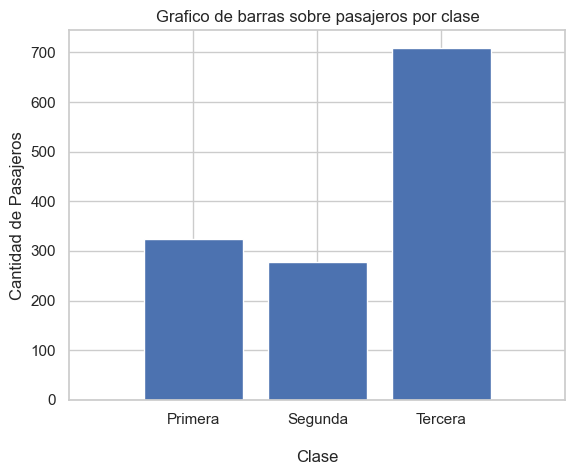

In [108]:
passenger_count_by_class = df['clases'].value_counts()

# Crear gráfico de barras
fig, ax = plt.subplots()
ax.bar(passenger_count_by_class.index, passenger_count_by_class.values)
ax.set_xlabel('\nClase')
ax.set_ylabel('Cantidad de Pasajeros')
ax.set_title('Grafico de barras sobre pasajeros por clase')

ax.set_xlim(0, 4)
ax.set_xticks(range(1, 4, 1))
ax.set_xticklabels(['Primera', 'Segunda', 'Tercera'])

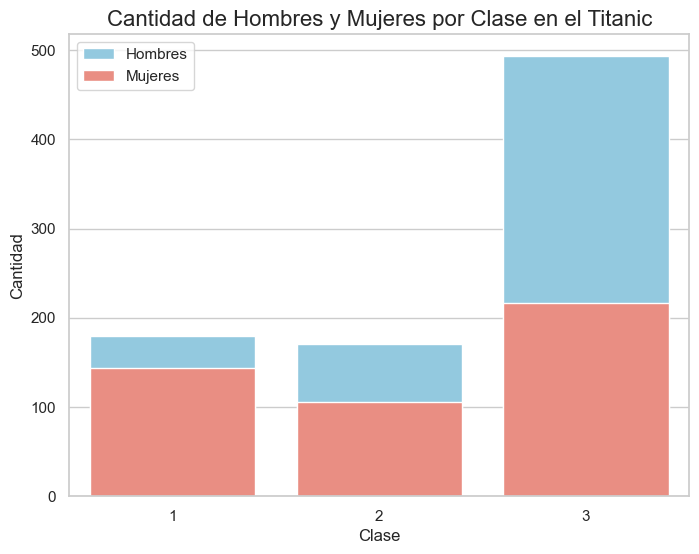

In [109]:

# Filtrar los datos por sexo masculino y femenino
hombres = df[df['sexo'] == 'hombre']
mujeres = df[df['sexo'] == 'mujer']

# Contar la cantidad de hombres y mujeres en cada clase
hombres_por_clase = hombres['clases'].value_counts()
mujeres_por_clase = mujeres['clases'].value_counts()

# Crear un gráfico de barras
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar la cantidad de hombres por clase
sns.barplot(x=hombres_por_clase.index, y=hombres_por_clase.values, color='skyblue', label='Hombres')

# Graficar la cantidad de mujeres por clase
sns.barplot(x=mujeres_por_clase.index, y=mujeres_por_clase.values, color='salmon', label='Mujeres')

# Configurar el título y las etiquetas de los ejes
ax.set_title('Cantidad de Hombres y Mujeres por Clase en el Titanic', fontsize=16)
ax.set_xlabel('Clase')
ax.set_ylabel('Cantidad')

# Mostrar la leyenda
ax.legend()

In [110]:
primera_clase = df[df['clases'] == 2]
print("hombre")
print(hombres_por_clase)

print("\nmujeres")
print(mujeres_por_clase)

hombre
clases
3    493
1    179
2    171
Name: count, dtype: int64

mujeres
clases
3    216
1    144
2    106
Name: count, dtype: int64


In [116]:
# Filtrar y contar la cantidad de hombres y mujeres en cada clase
tabla = df.groupby(['clases', 'sexo']).size().unstack()
tabla['Total'] = tabla.sum(axis=1)
tabla['% Hombres'] = tabla['hombre'] / tabla['Total'] * 100
tabla['% Mujeres'] = tabla['mujer'] / tabla['Total'] * 100
# Mostrar la tabla
print(tabla)

sexo    hombre  mujer  Total  % Hombres  % Mujeres
clases                                            
1          179    144    323  55.417957  44.582043
2          171    106    277  61.732852  38.267148
3          493    216    709  69.534556  30.465444


([<matplotlib.axis.XTick at 0x1919ba83510>,
 [Text(1, 0, 'Primera'), Text(2, 0, 'Segunda'), Text(3, 0, 'Tercera')])

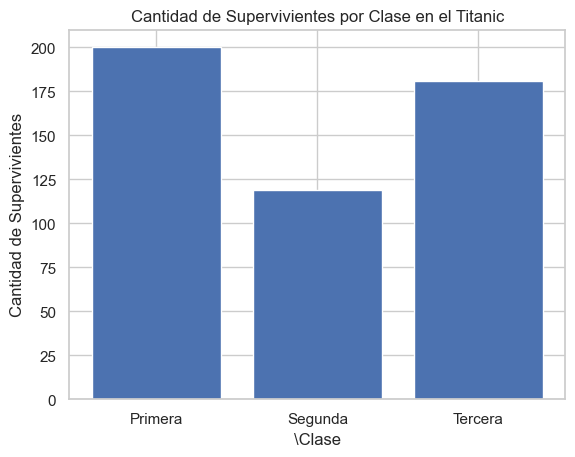

In [174]:
# Filtrar por supervivientes y contar por clase
supervivientes_por_clase = df[df['sobrevivio'] == 1].groupby('clases').size()

# Crear el gráfico de barras
plt.bar(supervivientes_por_clase.index, supervivientes_por_clase.values)

# Configurar el título y etiquetas de los ejes
plt.title('Cantidad de Supervivientes por Clase en el Titanic')
plt.xlabel('\Clase')
plt.ylabel('Cantidad de Supervivientes')
plt.xticks([1, 2, 3], ['Primera', 'Segunda', 'Tercera'])


In [8]:
# Filtrar y limpiar los datos de edad
age_data = df['edad'].dropna()

# Crear los intervalos de edad
bins = range(0, 100, 10)  # Intervalos de 10 años
labels = [f'{i}-{i+9}' for i in bins[:-1]]  # Etiquetas para los intervalos

# Crear la tabla de frecuencia
tabla_frecuencia = pd.cut(age_data, bins=bins, labels=labels, right=False)
tabla_frecuencia = tabla_frecuencia.value_counts().reset_index()
tabla_frecuencia.columns = ['Intervalo de Edad', 'Frecuencia de Personas']
tabla_frecuencia = tabla_frecuencia.sort_values('Intervalo de Edad')

# Mostrar la tabla de frecuencia
print(tabla_frecuencia)

tabla_frecuencia.to_excel('tabla_frecuencia_edades.xlsx', index=False)

  Intervalo de Edad  Frecuencia de Personas
4               0-9                      82
2             10-19                     143
0             20-29                     344
1             30-39                     232
3             40-49                     135
5             50-59                      70
6             60-69                      32
7             70-79                       7
8             80-89                       1


Text(0, 0.5, 'Frecuencia de Personas')

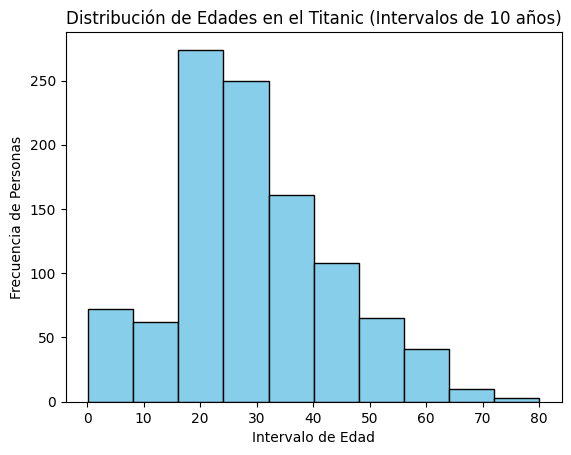

In [10]:
age_data = df['edad'].dropna()

# Crear los intervalos de edad
bins = range(0, 100, 10)  # Intervalos de 10 años

# Crear el histograma
plt.hist(age_data, color='skyblue', edgecolor='black')

# Configurar el título y etiquetas de los ejes
plt.title('Distribución de Edades en el Titanic (Intervalos de 10 años)')
plt.xlabel('Intervalo de Edad')
plt.ylabel('Frecuencia de Personas')